<a href="https://www.kaggle.com/code/shwetaundirwade/notebook609b6851c6?scriptVersionId=123666630" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/eda-ngrams-nlp/dataset_es_train.csv


**installing packages**

In [2]:
pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 13.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=7c844ef9d3c887793177d1f21c95c82f8ab292615eea5c16026a6ab81bbc5291
  Stored in directory: /root/.cache/pip/wheels/73/b2/db/0c9b9eb7a44bf85ec0b42c06ee617d0a0de66840dc0b3248d1
Successfully built langdetect
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install googletrans==3.1.0a0

  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 33.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 5.3 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16368 sha256=613da402400ebac32f8dc516655a75a5d994cbca51e9922a5f229e9207993ef4
  Stored in directory: /root/.cache/pip/wheels/61/f7/ef/4d5c03c448eb8583bc063caca7e8802d8801af40c65e9b8022
Successfully built googletrans
  Attempting uninstall: h11
    Found existing installation: h11 0.14.0
    Uninstalling h11-0.

**importing libraries**

In [4]:
## for dataframe and statistical operation
import pandas as pd 
import numpy as np 

# for data pre processing 
from string import punctuation
from nltk.corpus import stopwords

# detecting lang
from langdetect import detect
from googletrans import Translator # translation

# for visualization 
import seaborn as sns 
import matplotlib.pyplot as plt

## EDA to convert text to numerical 
from wordcloud import WordCloud
from nltk.util import ngrams

# token 1.word token 2. sentence token
from nltk.tokenize import word_tokenize

In [5]:
data= pd.read_csv("/kaggle/input/eda-ngrams-nlp/dataset_es_train.csv")

In [6]:
data.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0491108,product_es_0296024,reviewer_es_0999081,1,Nada bueno se me fue ka pantalla en menos de 8...,television Nevir,es,electronics
1,es_0869872,product_es_0922286,reviewer_es_0216771,1,"Horrible, nos tuvimos que comprar otro porque ...",Dinero tirado a la basura con esta compra,es,electronics
2,es_0811721,product_es_0474543,reviewer_es_0929213,1,Te obligan a comprar dos unidades y te llega s...,solo llega una unidad cuando te obligan a comp...,es,drugstore
3,es_0359921,product_es_0656090,reviewer_es_0224702,1,"No entro en descalificar al vendedor, solo pue...",PRODUCTO NO RECIBIDO.,es,wireless
4,es_0068940,product_es_0662544,reviewer_es_0224827,1,Llega tarde y co la talla equivocada,Devuelto,es,shoes


In [7]:
data = data[["review_body","stars"]]
data=data.sample(1000)

In [8]:
data.reset_index(drop=True,inplace=True)

In [9]:
data

,review_body,stars
0,Buena relación calidad y precio,5
1,"Me ha gustado mucho el sonido, sobre todo cone...",3
2,"La mesa está bastante bien, cumple su función,...",4
3,"Rinde mucho, se puede aplicar en toda la cara,...",5
4,Las barillas que sujetan las piedras son muy f...,1
...,...,...
995,Muy pequeña y más cara que en tienda,2
996,"Los he devuelto. Funcionan, pero la calidad de...",2
997,Buena calidad. Los tamaños perfectos para mí,5
998,Va muy bien no irrita la piel.yo gasto en la d...,3


**writing function for detecting language**

In [10]:
# lang detect 
def lang_detect(data):
    lang = detect(data)
    return lang

In [11]:
data["detected_lang"] = data["review_body"].apply(lang_detect)

In [12]:
data  ## es is code for language

,review_body,stars,detected_lang
0,Buena relación calidad y precio,5,es
1,"Me ha gustado mucho el sonido, sobre todo cone...",3,es
2,"La mesa está bastante bien, cumple su función,...",4,es
3,"Rinde mucho, se puede aplicar en toda la cara,...",5,es
4,Las barillas que sujetan las piedras son muy f...,1,es
...,...,...,...
995,Muy pequeña y más cara que en tienda,2,es
996,"Los he devuelto. Funcionan, pero la calidad de...",2,es
997,Buena calidad. Los tamaños perfectos para mí,5,es
998,Va muy bien no irrita la piel.yo gasto en la d...,3,es


In [13]:
data["detected_lang"].unique()

array(['es', 'pt', 'tl', 'fi', 'ca', 'sk', 'de', 'en'], dtype=object)

**translating above language (es) into English for that write down function here**

In [14]:
def lang_translator(data):
    translator = Translator()
    translated_text = translator.translate(data)
    return translated_text.text

In [15]:
data["translated_review"] = data.review_body.apply(lang_translator)

In [16]:
data

,review_body,stars,detected_lang,translated_review
0,Buena relación calidad y precio,5,es,Good quality-price relation
1,"Me ha gustado mucho el sonido, sobre todo cone...",3,es,"I really liked the sound, especially connected..."
2,"La mesa está bastante bien, cumple su función,...",4,es,"The table is quite good, it fulfills its funct..."
3,"Rinde mucho, se puede aplicar en toda la cara,...",5,es,"It yields a lot, it can be applied all over th..."
4,Las barillas que sujetan las piedras son muy f...,1,es,The rods that hold the stones are very fragile...
...,...,...,...,...
995,Muy pequeña y más cara que en tienda,2,es,Very small and more expensive than in store
996,"Los he devuelto. Funcionan, pero la calidad de...",2,es,"I have returned them. They work, but the sound..."
997,Buena calidad. Los tamaños perfectos para mí,5,es,Good quality. The perfect sizes for me
998,Va muy bien no irrita la piel.yo gasto en la d...,3,es,It goes very well and does not irritate the sk...


In [17]:
def extract_ngrams(data,ngram_range):
        ngram_zip = ngrams(data,ngram_range)
        final_ngram = []
        for i in ngram_zip:
            final_ngram.append(" ".join(i))
            return final_ngram

In [18]:
unigrams = data.translated_review.apply(lambda x : extract_ngrams(x,1))

**Removing punctuation and stopwords**

In [19]:
stopword_list = stopwords.words("english")
stopword_list.remove("no")
stopword_list.remove("nor")
stopword_list.remove("not")

def clean_text(data):
    tokens = word_tokenize(data)
    clean_data = [word.lower() for word in tokens if (word.lower() not in punctuation) and (word.lower() not in stopword_list) and ( len(word)>2) and (word.isalpha()) ]
    return clean_data

In [20]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

* **Data Cleaning**

In [21]:
clean_data = data.translated_review.apply(clean_text)

In [22]:
clean_data

0                                       [good, relation]
1      [really, liked, sound, especially, connected, ...
2      [table, quite, good, fulfills, function, altho...
3      [yields, lot, applied, face, moment, good, res...
4      [rods, hold, stones, fragile, break, easily, c...
                             ...                        
995                            [small, expensive, store]
996    [returned, work, sound, quality, worse, headph...
997                      [good, quality, perfect, sizes]
998    [goes, well, not, irritate, skin, spend, showe...
999    [seen, photo, meeted, expectations, good, look...
Name: translated_review, Length: 1000, dtype: object

In [23]:
unigram_list = clean_data.apply(lambda x : extract_ngrams(x,1))

In [24]:
unigram_list

0          [good]
1        [really]
2         [table]
3        [yields]
4          [rods]
          ...    
995       [small]
996    [returned]
997        [good]
998        [goes]
999        [seen]
Name: translated_review, Length: 1000, dtype: object

In [25]:
final_unigram =[]
for i in unigram_list:
    final_unigram.extend(i)

In [26]:
from collections import Counter

In [27]:
cnt = Counter(final_unigram).most_common(100)
cnt

[('good', 74),
 ('not', 46),
 ('bought', 26),
 ('product', 22),
 ('perfect', 19),
 ('arrived', 14),
 ('bad', 14),
 ('beautiful', 12),
 ('like', 12),
 ('expected', 10),
 ('well', 10),
 ('everything', 9),
 ('works', 9),
 ('liked', 9),
 ('easy', 8),
 ('first', 8),
 ('poor', 8),
 ('hello', 8),
 ('used', 8),
 ('looks', 8),
 ('great', 8),
 ('price', 7),
 ('correct', 7),
 ('quality', 6),
 ('truth', 6),
 ('know', 6),
 ('comfortable', 6),
 ('battery', 6),
 ('cover', 6),
 ('using', 6),
 ('although', 6),
 ('use', 6),
 ('returned', 5),
 ('small', 5),
 ('thought', 5),
 ('give', 5),
 ('work', 5),
 ('practical', 5),
 ('never', 5),
 ('one', 5),
 ('job', 5),
 ('cool', 5),
 ('seems', 5),
 ('light', 5),
 ('fast', 5),
 ('pretty', 5),
 ('really', 4),
 ('love', 4),
 ('seen', 4),
 ('nice', 4),
 ('fit', 4),
 ('looking', 4),
 ('quite', 4),
 ('little', 4),
 ('arrive', 4),
 ('already', 4),
 ('fulfills', 4),
 ('simple', 4),
 ('gift', 4),
 ('super', 3),
 ('glass', 3),
 ('photo', 3),
 ('fatal', 3),
 ('ordered', 3),

* **Bigram**

In [28]:
# bigram_list = clean_data.apply(lambda x : extract_ngrams(x,2))
# final_bigram =[]
# for i in bigram_list:
#     final_bigram.extend(i)

# cnt = Counter(final_bigram).most_common(100)
# cnt

**WORD CLOUD**

In [29]:
from wordcloud import WordCloud

In [30]:
data = data [["review_body","stars","detected_lang","translated_review"]]
data

,review_body,stars,detected_lang,translated_review
0,Buena relación calidad y precio,5,es,Good quality-price relation
1,"Me ha gustado mucho el sonido, sobre todo cone...",3,es,"I really liked the sound, especially connected..."
2,"La mesa está bastante bien, cumple su función,...",4,es,"The table is quite good, it fulfills its funct..."
3,"Rinde mucho, se puede aplicar en toda la cara,...",5,es,"It yields a lot, it can be applied all over th..."
4,Las barillas que sujetan las piedras son muy f...,1,es,The rods that hold the stones are very fragile...
...,...,...,...,...
995,Muy pequeña y más cara que en tienda,2,es,Very small and more expensive than in store
996,"Los he devuelto. Funcionan, pero la calidad de...",2,es,"I have returned them. They work, but the sound..."
997,Buena calidad. Los tamaños perfectos para mí,5,es,Good quality. The perfect sizes for me
998,Va muy bien no irrita la piel.yo gasto en la d...,3,es,It goes very well and does not irritate the sk...


In [31]:
def generate_wordcloud(data,column): # "w1 w2 w3 w4"
    df = data[column].str.cat(sep=" ")
    text = " ".join([word for word in df.split()])
    wordcloud = WordCloud(width=700,height=500,background_color="white").generate(text)
    plt.figure(figsize=(10,16))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

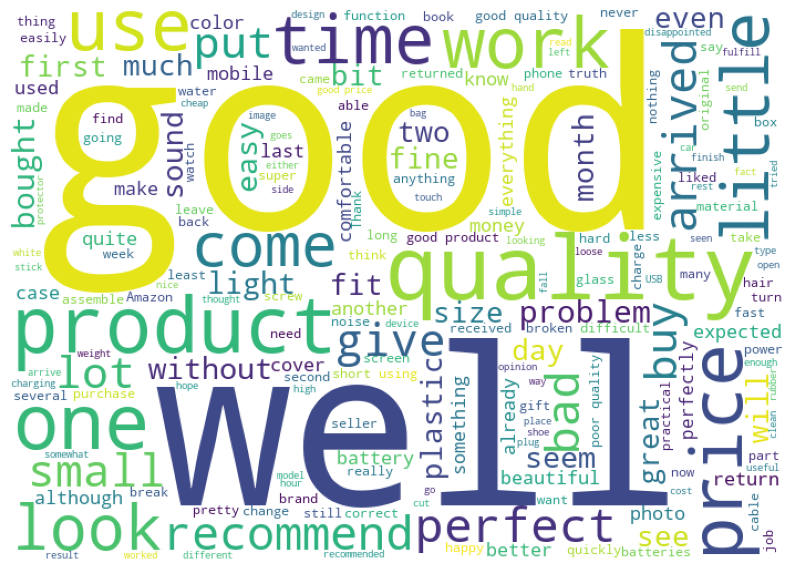

In [32]:
generate_wordcloud(data,"translated_review")